In [1]:
from fluids import H2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import prop_vary as pv
mpl.rc('font', family='Times New Roman',size="10")
mpl.rc('figure', figsize=(4.8,3.6))
mpl.rc('legend', labelspacing=0.05, framealpha=.6)
mpl.rc('savefig', dpi=800)
mpl.rc('lines', linewidth=1.2)
mpl.rc('axes', grid=True)
mpl.rc('grid', linewidth=0.25)
mpl.rc('mathtext', fontset="dejavuserif")
mpl.rc('xtick.minor', visible=True, size=1.5, width=0.5)
mpl.rc('ytick.minor', visible=True, size=1.5, width=0.5)
plt.rcParams['figure.constrained_layout.use'] =  True

In [2]:
base = pv.base
vary = pv.vary

yvals = dict()
xvals = dict()

base_core = H2(P=base["P_core"], T=base["T_core"])      # speed code up by not calculating on every single loop

In [3]:
def sweep(name, ylabel, ylim=None, scale=1, exclude=[]):
    plt.figure()
    yvals = np.load(f"{name}.npz", allow_pickle=True)
    n_pts = 50
    print(ylabel, yvals["baseline"]*scale)
    plt.grid(which="minor", axis="both", linewidth=0.2, alpha=0.33)
    for key in vary:       # plot each line
        if not key in exclude:
            lim = vary[key]                 # relative property value limits
            xvals[key] = np.arange(lim[0], lim[1]+1e-5, np.diff(lim)/n_pts)
            plt.plot(xvals[key], yvals[key]*scale, label=pv.labels[key], color=pv.cols[key])

    plt.xlim(0.4,2.05)
    if ylim is not None:
        plt.ylim(ylim)
    plt.legend(title="Normalized Parameter", title_fontproperties={"family": "Times New Roman:bold"})
    plt.xlabel("Parameter Normalized to Baseline Configuration")
    plt.ylabel(ylabel)
    plt.savefig(f"{name}.svg")

Turbine Work Rate (W) [153.5496221]
Turbine Efficiency [0.89574651]
Turbine Inlet Radius (cm) [5.35050383]
CFE mass (kg) [51.69982724]
Bearing Power Losses (W) [31.98677498]
Viscous Power Losses (W) [121.56284712]
Turbine Specific Speed [0.36229863]


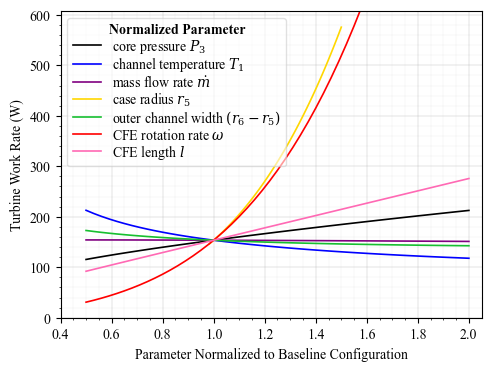

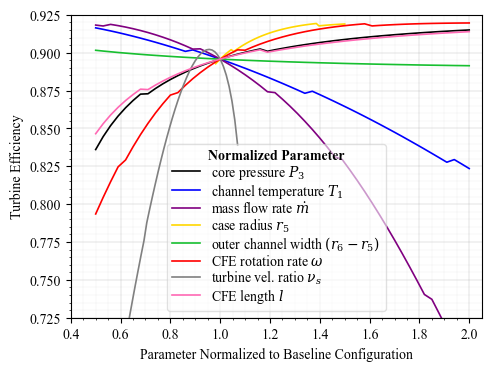

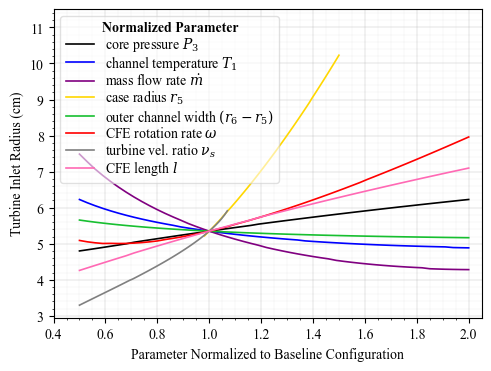

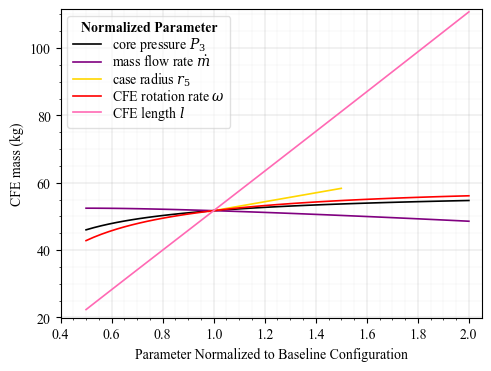

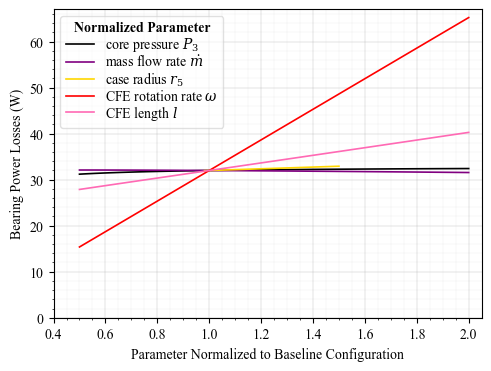

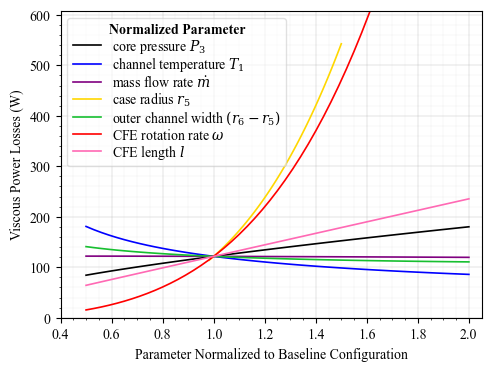

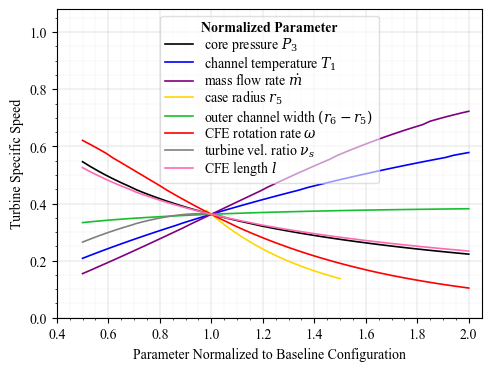

In [4]:
dir = "turbine_sweep"
savenames = ['eta', 'W_bear', 'W_visc', 'W', 'radius', 'mass']
sweep(f"{dir}/W", "Turbine Work Rate (W)", ylim=(0,608), scale=1, exclude=["nu_s"])
sweep(f"{dir}/eta", "Turbine Efficiency", ylim=(.725,.925))
sweep(f"{dir}/radius", "Turbine Inlet Radius (cm)", scale=100, ylim=(2.95, 11.5))
sweep(f"{dir}/mass", "CFE mass (kg)", ylim=(19.9,111.5), exclude=["nu_s", "d56", "T_channel"])
sweep(f"{dir}/W_bear", "Bearing Power Losses (W)", ylim=(0, 67),exclude=["nu_s", "d56", "T_channel"])
sweep(f"{dir}/W_visc", "Viscous Power Losses (W)", ylim=[0, 608], exclude=["nu_s"])
sweep(f"{dir}/N_s", "Turbine Specific Speed", ylim=[0, 1.08])

In [5]:
mpl.colors.to_rgb("limegreen")

(0.19607843137254902, 0.803921568627451, 0.19607843137254902)